In [1]:
from hlm_basic.ssn import GenerateNetwork, UpstreamArea
from hlm_basic.watershed import Watershed
from hlm_basic.tools import GetForcing, Set_InitialConditions, plot_sim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
l_id, connectivity, h_order, nextlink = GenerateNetwork(5)
n_hills = len(connectivity)
a_hill = 0.5 * 0.5 #km2
A_h = np.array([a_hill*10**6 for i in range(n_hills)]) #m2
L_i = np.array([0.4*10**3 for i in range(n_hills)])  #m
A_i = UpstreamArea(a_hill, connectivity, h_order) #km2

In [3]:
forcing, raw_data = GetForcing("../data/rainfall/2010_timeseries.csv", '2010-06-01','2010-08-01')
te = len(forcing)
q, s_p, s_t, s_s = Set_InitialConditions(0.5, A_i[0], A_i)

In [24]:
# dams = [9,36,45,63,90,117,126,144,153,171,198,207,225,234] 
dams = [9,27,36,45,63,90,108,117,126,135,144,153,171,189,198,207,216,225,234] 
n_dams = len(dams)
S = [100000 for _ in range(n_dams)]

In [5]:
SSN1 = Watershed(Model=254)
SSN1.init_custom(links=l_id, connectivity=connectivity, A_i=A_i, L_i=L_i, A_h=A_h)
SSN1.initialize(q=q, s_p=s_p, s_t=s_t, s_s=s_s)
dc_nodam = SSN1.Run_254( [0, te-1],forcing, rtol=1e-4, t_eval=np.arange(0,te,5))

Model 254 is being used!
87839

In [25]:
SSN2 = Watershed(Model=255)
SSN2.init_custom(links=l_id, connectivity=connectivity, A_i=A_i, L_i=L_i, A_h=A_h)
SSN2.dam_ids = dams
SSN2.dam_loc_state(states=[1 for _ in range(n_dams)])
dam_params = [4.5, 5, 200000, 0.5, 0.75, 0.6, 1.66, 1, 10]
SSN2.initialize(q=q, S = S, s_t =s_t, s_p =s_p, s_s=s_s)

dc_passive, st_passive = SSN2.Run_255( [0, te-1], forcing, dam_params,rtol=1e-4,t_eval=np.arange(0,te,5))


Model 255 (254 with_dams) is being used!
87839

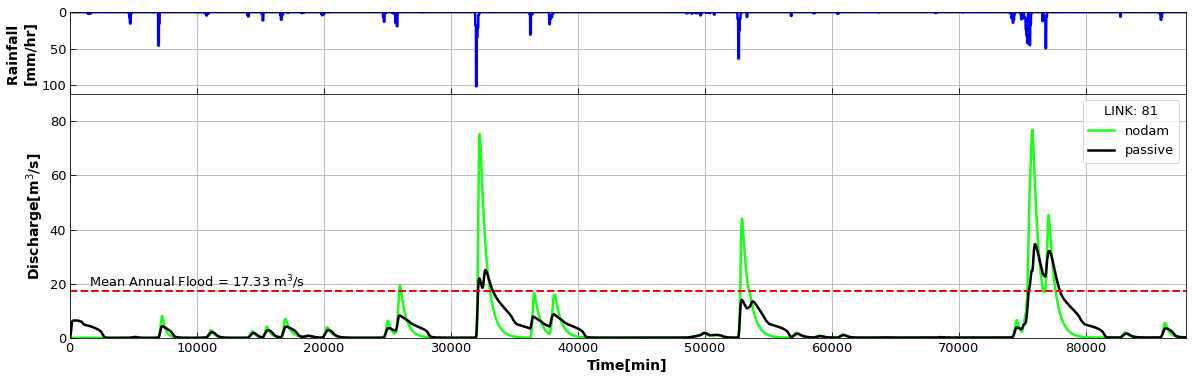

In [26]:
s_name = '_h45_5_O75_1_10_19dams' 
pltKwargs = [{'label':'nodam', 'color':'#1AFF1A'}, {'label':'passive', 'color':'k'}]
plot_sim(81, forcing, [dc_nodam, dc_passive], pltKwargs, d_type='discharge', discharge_axis=[0,90,20], area=20.25, save='../../Supp_DamStudy/Hydro81'+s_name)

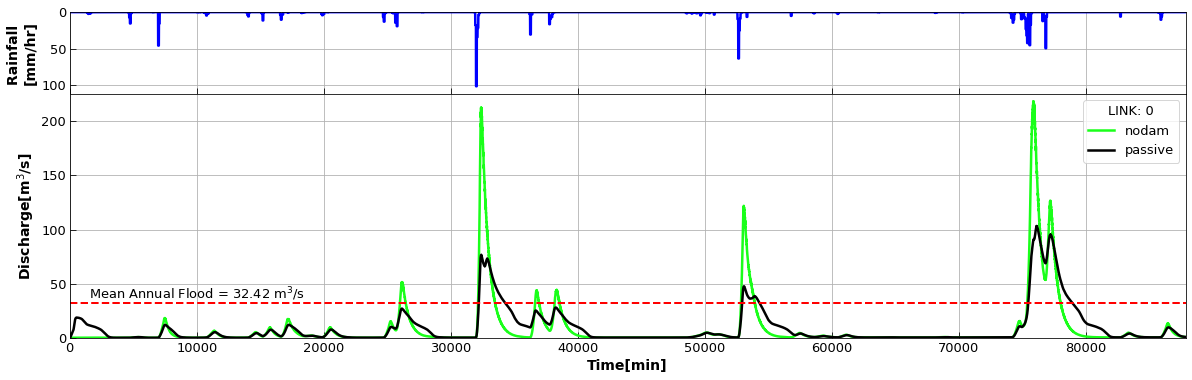

In [27]:
plot_sim(0, forcing, [dc_nodam, dc_passive], pltKwargs, d_type='discharge', discharge_axis=[0,225,50], area=60.75, save='../../Supp_DamStudy/Hydro0'+s_name)

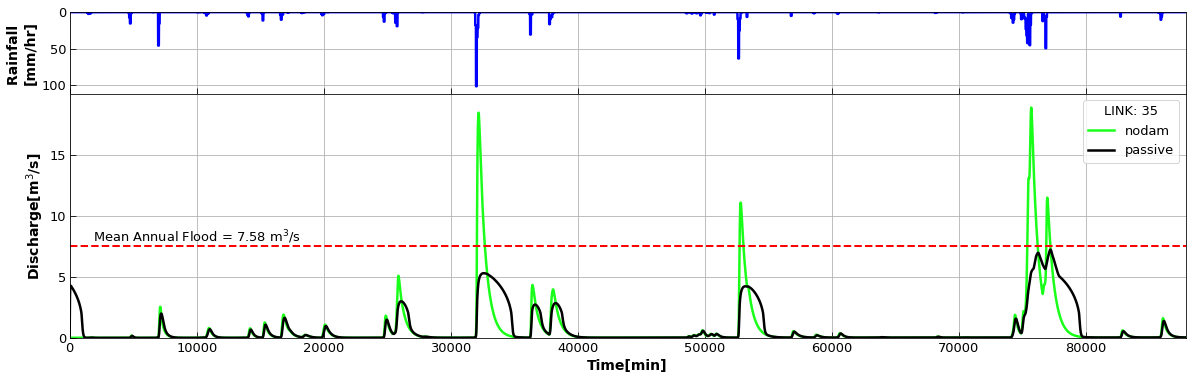

In [28]:
plot_sim(35, forcing, [dc_nodam, dc_passive], pltKwargs, d_type='discharge', discharge_axis=[0,20,5], area=4.75, save='../../Supp_DamStudy/Hydro35'+s_name)

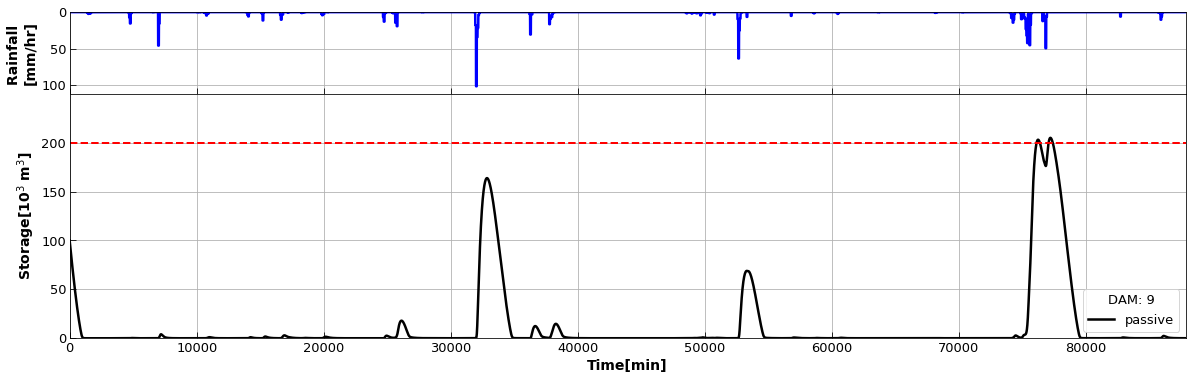

In [29]:
plot_sim(9, forcing, [st_passive], [pltKwargs[1]], d_type='storage', save='../../Supp_DamStudy/Vol9'+s_name)


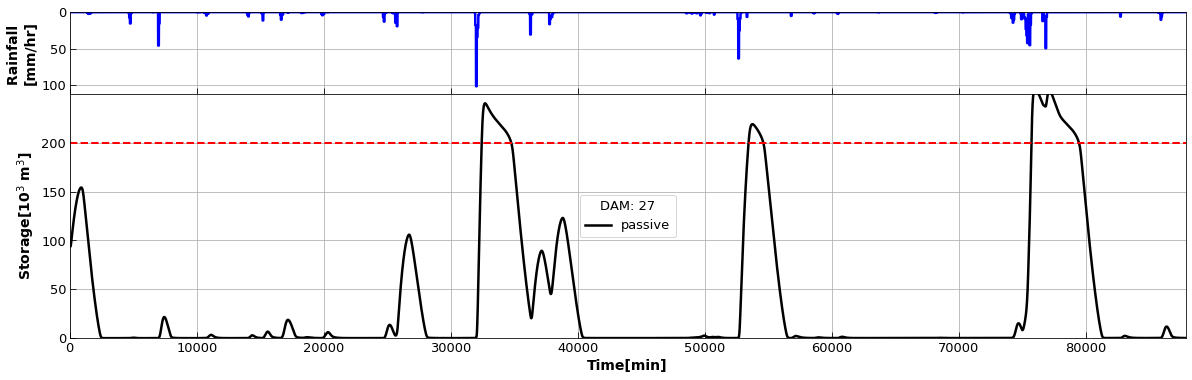

In [30]:
plot_sim(27, forcing, [st_passive], [pltKwargs[1]], d_type='storage', save='../../Supp_DamStudy/Vol27'+s_name)

In [47]:

from imp import reload 
import hlm_basic
reload(hlm_basic.tools)
from hlm_basic.tools import plot_sim